<a href="https://colab.research.google.com/github/Hands-On-Fraud-Analytics/Chapter-18-Classification-Techniques-For-Fraud-Detection/blob/main/Chapter_18_Classification_Techniques_For_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Project 1: Predict the Churn Rate of Customers**

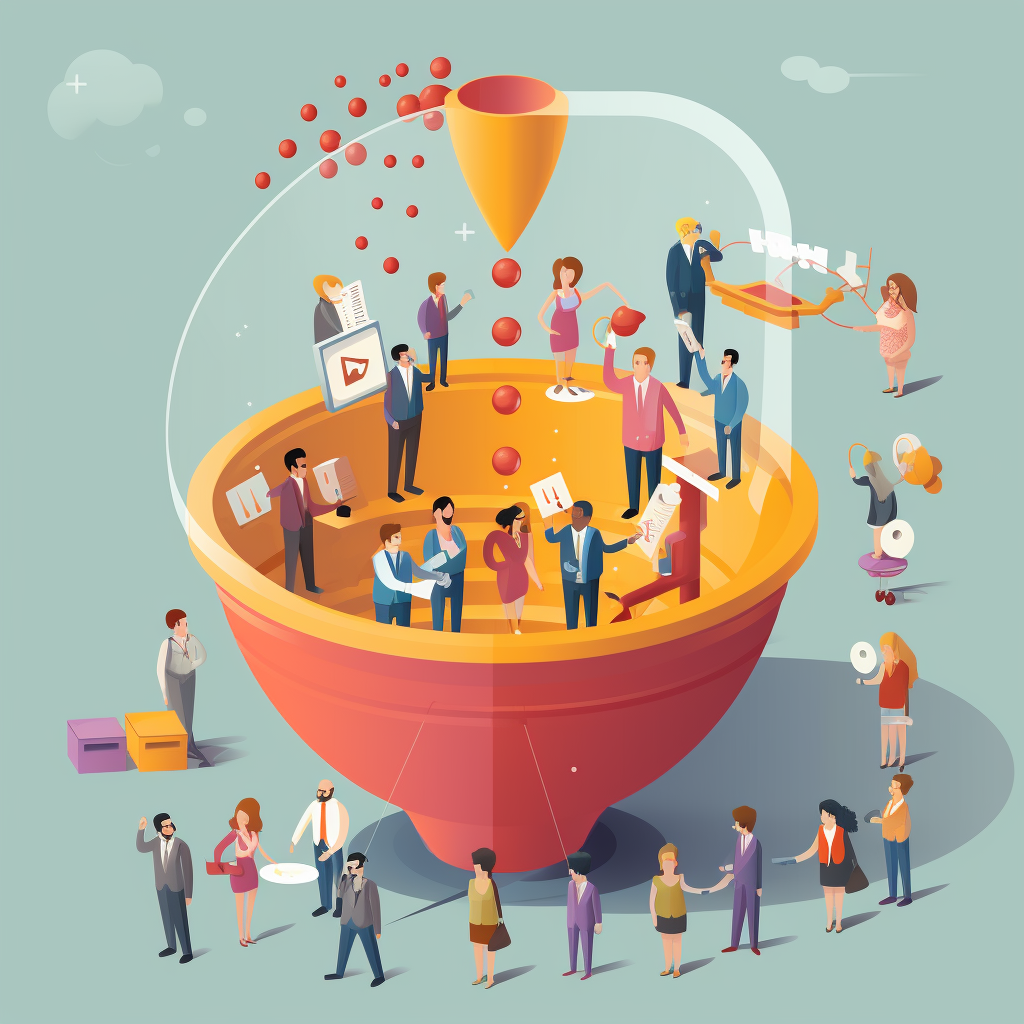

## CODING TASK #1: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [ ]:
import numpy as np # Multi-dimensional array manipulation
import pandas as pd # DataFrame Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
from sklearn import metrics


In [ ]:
# Read the CSV file
telecom_df = pd.read_csv("telecom_churn.csv")

In [ ]:
# Load the top 5 instances
telecom_df.head()

In [ ]:
# Load the bottom 5 instances
telecom_df.tail()

In [ ]:
# Check the shape of the dataframe
telecom_df.shape

In [ ]:
# Display the feature columns
telecom_df.columns

In [ ]:
# Obtain the summary of the dataframe data types
telecom_df.dtypes

In [ ]:
import pandas as pd

# Assuming telecom_df is your DataFrame

unique_value = []
most_common = []
least_common = []
column_name = []
column_type = []

# Iterate through the columns
for col in telecom_df.columns:
    # Append column name
    column_name.append(str(col))

    # Append number of unique values and column data type
    unique_value.append(telecom_df[col].nunique())
    column_type.append(str(telecom_df[col].dtype))

    # Calculate value counts
    value_counts = telecom_df[col].value_counts()

    # Check if value_counts is not empty
    if not value_counts.empty:
        # Get the most and least common value and its count
        most_common_value, most_common_count = value_counts.idxmax(), value_counts.max()
        least_common_value, least_common_count = value_counts.idxmin(), value_counts.min()

        most_common.append(f"{most_common_value} ({most_common_count})")
        least_common.append(f"{least_common_value} ({least_common_count})")
    else:
        # In case of empty value_counts (all elements are NaN)
        most_common.append('NaN')
        least_common.append('NaN')

# Create a summary table
table = pd.DataFrame({
    'Column Name': column_name,
    'Unique Values': unique_value,
    'Most Common': most_common,
    'Least Common': least_common,
    'Data Type': column_type
})

# Sort the table based on the number of unique values
table = table.sort_values('Unique Values', ascending=False)
table


,Column Name,Unique Values,Most Common,Least Common,Data Type
3,phone_number,5000,2845 (1),2845 (1),int64
7,total_day_minutes,1961,189.3 (10),114.6 (1),float64
9,total_day_charge,1961,32.18 (10),19.48 (1),float64
10,total_eve_minutes,1879,169.9 (10),213.5 (1),float64
13,total_night_minutes,1853,188.2 (11),218.1 (1),float64
12,total_eve_charge,1659,15.9 (15),7.87 (1),float64
15,total_night_charge,1028,9.66 (19),2.76 (1),float64
1,account_length,218,90 (65),243 (1),int64
18,total_intl_charge,170,3.0 (90),5.21 (1),float64
16,total_intl_minutes,170,11.1 (90),19.3 (1),float64


Based on the dataset information provided, here are the observations:

1. **Phone Number (Column 3):** Each of the 5,000 phone numbers appears to be unique. This suggests that the phone number is an identifier for each record.

2. **Call Durations and Charges (Columns 7, 9, 10, 12, 13, 15):** These columns represent various aspects of call durations (in minutes) and corresponding charges for day, evening, and night calls. The range of unique values indicates diversity in usage patterns among customers.

3. **Account Length (Column 1):** Represents the duration of the account's existence, with 218 unique values. The most common account length is 90 days.

4. **International Charges and Minutes (Columns 16, 18):** Reflects international call usage with 170 unique values in both minutes and corresponding charges. The most common value is 11.1 minutes and a charge of 3.0.

5. **Call Frequencies (Columns 8, 11, 14):** Represents the number of calls made during different times of the day. There's a moderate range of unique values, indicating varied calling behavior.

6. **State (Column 0):** With 51 unique values, it likely represents the U.S. states and territories. The most common state has 158 occurrences.

7. **Number of Voicemail Messages (Column 6):** This varies significantly among customers, with the majority not using voicemail (0 messages).

8. **Total Intl Calls (Column 17):** Shows the number of international calls made, with a relatively small range (21 unique values).

9. **Customer Service Calls (Column 19):** Reflects how often customers contact customer service, with a maximum of 10 different values. Most customers have made 1 customer service call.

10. **Area Code (Column 2):** There are only 3 unique values, which could be categorical representing different geographical regions.

11. **Voice Mail and International Plans (Columns 5, 4):** Binary variables indicating the subscription status of voice mail and international plans.

12. **Class (Column 20):** A binary target variable, possibly indicating customer churn, with '0' being the majority class.

Overall, the dataset seems to cover various aspects of telecommunication customer behavior, including usage patterns, service plan subscriptions, and customer service interactions. The class distribution suggests a potential classification problem, possibly predicting customer churn or a similar binary outcome. The diversity in call patterns and service plan choices indicates good variability in the data, which is beneficial for predictive modeling. However, the imbalance in the target variable (class) needs to be addressed during modeling.

**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **What is the maximum and average daily minutes?**

# CODING TASK #2: PERFORM DATA VISUALIZATION

In [ ]:
telecom_df.hist(figsize = (30, 30))
plt.show()

In [ ]:
telecom_df["class"].value_counts()

In [ ]:
plt.figure(figsize = [10, 10])
telecom_df["class"].value_counts().plot(kind='pie')

In [ ]:
# Correlation Matrix
corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True,
               fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# It is clearly shown that "total day charge" and "total daily minutes" are highly correlated.

In [ ]:
# Churn by day charges
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Plot the KDE plot showing evening charges for both retained and churned customers**

# CODING TASK #3: IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING

In [ ]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data.
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output (Churn) to y

X = telecom_df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = telecom_df["class"]

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 150)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

In [ ]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [ ]:
# The above graph is generated by Random Forest algorithm
# The graph indicates that "total_day_minutes" tops the list of important features followed by "total_day_minutes" and so on.

# CODING TASK #4: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()

model_LR.fit(X_train, y_train)

In [ ]:
y_predict = model_LR.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0.


**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Print out the confusion Matrix and comment on the results**


# CODING TASK #5: TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

In [ ]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svc)
model_svm.fit(X_train, y_train)

In [ ]:
y_predict = model_svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# CODING TASK #6: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

In [ ]:
y_predict = model_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# CODING TASK #7: TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

In [ ]:
y_predict = model_knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**
- **Which of the following answers represent the Euclidean distance between the two points A(1, 3) and B(2, 3)?**

1. 2
2. 4
3. 1
4. 8

# CODING TASK #8: TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

In [ ]:
y_predict = model_gnb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# CODING TASK #9: COMPARE TRAINED CLASSIFIER MODELS AND CONCLUDING REMARKS

Check this out: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [ ]:
model_LR.predict_proba(X_test)
# The first element is the probability that the output will be 0
# The second element is the probabiliy that the output will be 1

In [ ]:
model_LR.predict_proba(X_test)[:, 1]

In [ ]:
y_test

In [ ]:
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [ ]:
fpr1

In [ ]:
tpr1

In [ ]:
thresh1

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [ ]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

In [ ]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

The graph represents that Random Forest algorithm produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.

In [ ]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Random Forest Classifier model

1. Accuracy: ~96% label accuracy
2. Precision: ~96% labeled as Retained customers and ~94% labeled as churned customers
3. Recall: ~99% labeled as Retained customers and ~76% labeled as churned customers

Note: We can improve this model even more better by using "Grid Search" method.

Great resource on Grid Search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

# GREAT JOB!

Any publications based on this dataset should acknowledge the following:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset can be found here at the UCI Machine Learning Repository.



# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **What is the maximum and average daily minutes?**

In [ ]:
# Display the statistical details of the dataframe
telecom_df.describe()

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Plot the KDE plot showing evening charges for both retained and churned customers**

In [ ]:
# Churn by evening charges
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

**PRACTICE OPPORTUNITY #3 SOLUTION:**
- **Print out the confusion Matrix and comment on the results**


In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

**PRACTICE OPPORTUNITY #4 SOLUTION:**
- **Which of the following answers represent the Euclidean distance between the two points A(1, 3) and B(2, 3)?**

1. 2
2. 4
3. 1
4. 8

sqrt((1-2)^2 + (3-3)^2)= 1

# **Final Project Lab: Predicting the Health Insurance Cost using AutoGluon**

Source: https://www.publicdomainpictures.net/en/view-image.php?image=279909&picture=medical-insurance

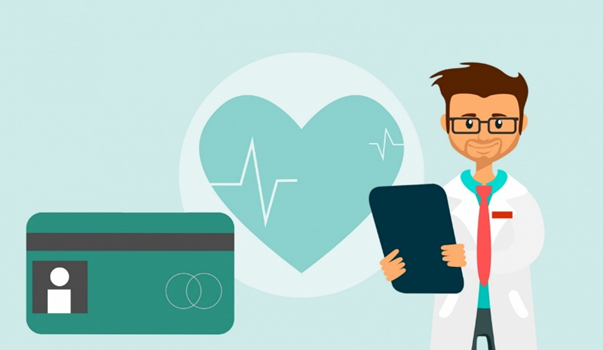


# **CODING TASK #1: IMPORT LIBRARIES AND DATASETS**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Installing Important Packages**

In [ ]:
# For Autogluon to work in Google Colab, you need to install ipykernel and restart the notebook
# The IPython kernel is the Python execution backend for Jupyter
!pip install -U ipykernel

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

In [ ]:
# pip install autogluon autogluon.tabular "mxnet<2.0.0"

In [ ]:
insurance_df = pd.read_csv('insurance.csv')

In [ ]:
insurance_df

PRACTICE OPPORTUNITY #1 [OPTIONAL]:

- How many unique regions do we have in the insurance_df DataFrame?

# **CODING TASK #2: PERFORM EXPLORATORY DATA ANALYSIS**

In [ ]:
# Explore the first five rows in the DataFrame
insurance_df.head(3)

In [ ]:
# Explore the last five rows in the DataFrame
insurance_df.tail()

In [ ]:
# Generate statistical summary
insurance_df.describe()

In [ ]:
# Obtain dataset information
insurance_df.info()

In [ ]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by='region').mean()
df_region

PRACTICE OPPORTUNITY #2 [OPTIONAL]:

- Group data by 'age' and examine the relationship between 'age' and 'charges'

# **CODING TASK #3: PERFORM DATA VISUALIZATION**

In [ ]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
# check if there are any Null values
insurance_df.isnull().sum()

In [ ]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (12, 12), color = 'r');


In [ ]:
# plot pairplot
sns.pairplot(insurance_df)

In [ ]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()


In [ ]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()


PRACTICE OPPORTUNITY #3 [OPTIONAL]:

- Calculate and plot the correlation matrix
- Which feature has the most positive correlation with charges?

# **CODING TASK #4: TRAIN MULTIPLE MODELS USING AUTOGLUON**

In [ ]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(insurance_df, test_size=0.2, random_state=0)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
# Train multiple ML regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
# For regression type problems, 'label' values are generally floating point non-integers with large number of unique values

predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

In [ ]:
predictor.fit_summary()

# **CODING TASK #5: EVALUATE TRAINED MODELS PERFORMANCE**

In [ ]:
predictor.leaderboard()

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

In [ ]:
predictor.evaluate(X_test)

In [ ]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])

In [ ]:
X_test

In [ ]:
y_test = X_test['charges']
y_test #groundtruth

In [ ]:
y_predict = predictor.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

PRACTICE OPPORTUNITY #4 [OPTIONAL]:

- Retrain a regressor model using AutoGluon with different preset value
- Set the limit_time to 300 secs
- Use RMSE as the key metric and plot the barchart
- Which model provides the best performance?
- Assess trained model performance by comparing various metrics

# **PRACTICE OPPORTUNITY SOLUTIONS**

PRACTICE OPPORTUNITY #1 SOLUTION:

- How many unique regions do we have in the insurance_df?

In [ ]:
insurance_df['region'].unique()

PRACTICE OPPORTUNITY #2 SOLUTION:

- Group data by 'age' and examine the relationship between 'age' and 'charges'

In [ ]:
df_age = insurance_df.groupby(by = 'age').mean()
df_age

PRACTICE OPPORTUNITY #3 SOLUTION:

- Calculate and plot the correlation matrix
- Which feature has the most positive correlation with charges?

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(insurance_df.corr(), annot = True);
# smoker and age have positive correlations with charges

PRACTICE OPPORTUNITY #4 SOLUTION:

- Retrain a regressor model using AutoGluon with different preset value
- Set the limit_time to 300 secs
- Use RMSE as the key metric and plot the barchart
- Which model provides the best performance?
- Assess trained model performance by comparing various metrics

In [ ]:
predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'rmse').fit(train_data = X_train, time_limit = 300, presets = "optimize_for_deployment")
predictor.fit_summary()
predictor.leaderboard()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (RMSE)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

predictor.evaluate(X_test)